module end assignment

In [3]:
# ======================================================
# MODULE 1 : END PROJECT
# ABC Company Employee Data Analysis
# ======================================================

# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Loading dataset from Google Sheets (CSV export link)
url = "https://docs.google.com/spreadsheets/d/1aDiNQMStFPyY7mJEgt2sIAApFrG2uE19/export?format=csv"
df = pd.read_csv(url)

# Display first 5 rows
print("First 5 rows of dataset:")
df.head()


First 5 rows of dataset:


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
# Replacing height column with random values between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))

# Check dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int64  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 32.3+ KB


In [5]:
team_count = df['Team'].value_counts()
team_percentage = (team_count / len(df)) * 100

team_distribution = pd.DataFrame({
    'Employee Count': team_count,
    'Percentage (%)': team_percentage
})

team_distribution


,Employee Count,Percentage (%)
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
Milwaukee Bucks,16,3.493450
New York Knicks,16,3.493450
Boston Celtics,15,3.275109
Los Angeles Clippers,15,3.275109
Los Angeles Lakers,15,3.275109
Phoenix Suns,15,3.275109


from matplotlib import pyplot as plt
team_distribution['Employee Count'].plot(kind='hist', bins=20, title='Employee Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
team_distribution['Percentage (%)'].plot(kind='hist', bins=20, title='Percentage (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
team_distribution.plot(kind='scatter', x='Employee Count', y='Percentage (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
team_distribution['Employee Count'].plot(kind='line', figsize=(8, 4), title='Employee Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
team_distribution['Percentage (%)'].plot(kind='line', figsize=(8, 4), title='Percentage (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

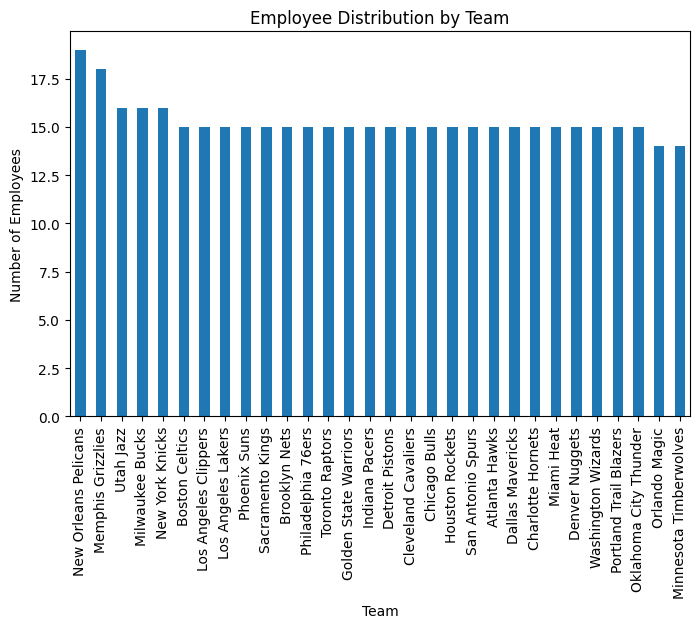

In [6]:
plt.figure(figsize=(8,5))
team_count.plot(kind='bar')
plt.title("Employee Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.show()


In [7]:
position_count = df['Position'].value_counts()
position_count


,count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


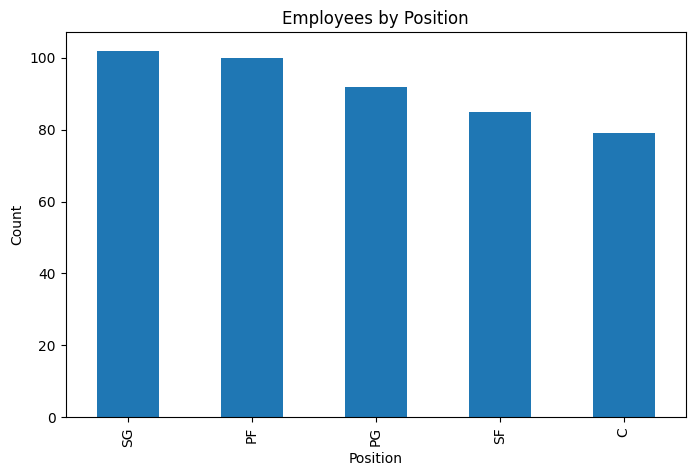

In [8]:
plt.figure(figsize=(8,5))
position_count.plot(kind='bar')
plt.title("Employees by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()


In [9]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_count = df['Age Group'].value_counts()
age_group_count


,count
Age Group,
26-35,235
18-25,200
36-45,23
46-55,0
56-65,0


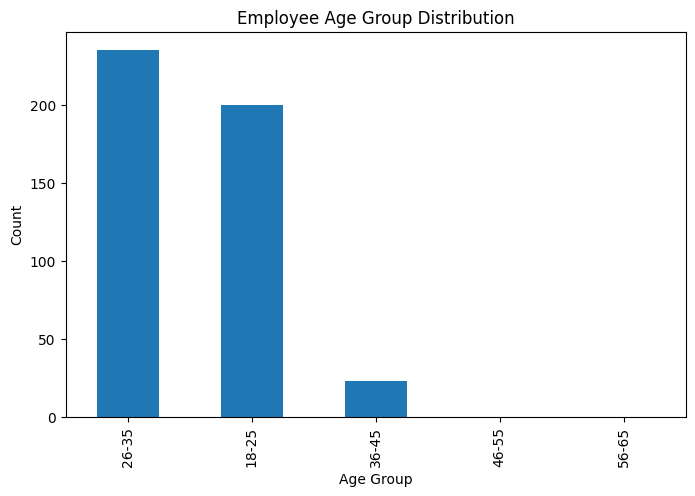

In [10]:
plt.figure(figsize=(8,5))
age_group_count.plot(kind='bar')
plt.title("Employee Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


In [11]:
# Salary expenditure by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

# Salary expenditure by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

team_salary, position_salary


(Team
 Cleveland Cavaliers       106988689.0
 Los Angeles Clippers       94854640.0
 Oklahoma City Thunder      93765298.0
 Golden State Warriors      88868997.0
 Chicago Bulls              86783378.0
 San Antonio Spurs          84442733.0
 New Orleans Pelicans       82750774.0
 Miami Heat                 82515673.0
 Charlotte Hornets          78340920.0
 Memphis Grizzlies          76550880.0
 Washington Wizards         76328636.0
 Houston Rockets            75283021.0
 New York Knicks            73303898.0
 Atlanta Hawks              72902950.0
 Los Angeles Lakers         71770431.0
 Sacramento Kings           71683666.0
 Dallas Mavericks           71198732.0
 Toronto Raptors            71117611.0
 Milwaukee Bucks            69603517.0
 Detroit Pistons            67168263.0
 Indiana Pacers             66751826.0
 Utah Jazz                  64007367.0
 Phoenix Suns               63445135.0
 Orlando Magic              60161470.0
 Denver Nuggets             60121930.0
 Minnesota Timberwo

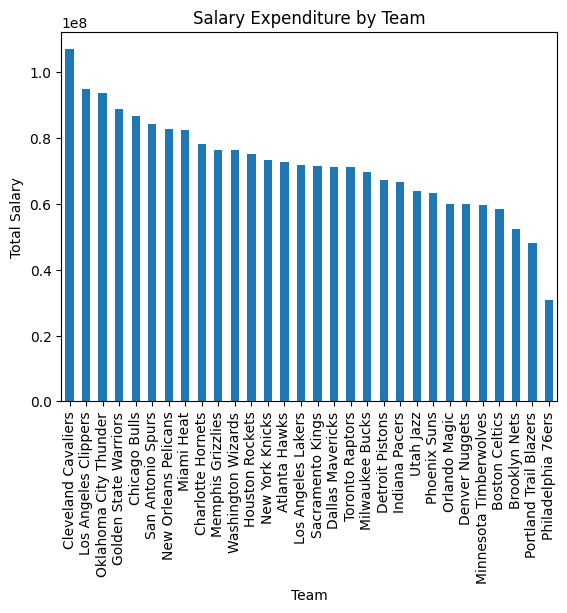

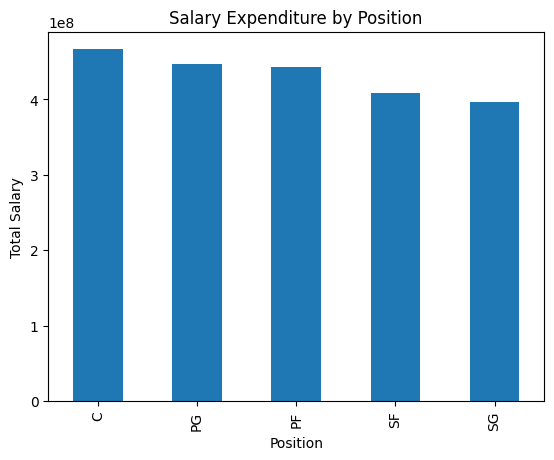

In [12]:
team_salary.plot(kind='bar', title="Salary Expenditure by Team")
plt.ylabel("Total Salary")
plt.show()

position_salary.plot(kind='bar', title="Salary Expenditure by Position")
plt.ylabel("Total Salary")
plt.show()


In [14]:
correlation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary:", correlation)


Correlation between Age and Salary: 0.21400941226570971


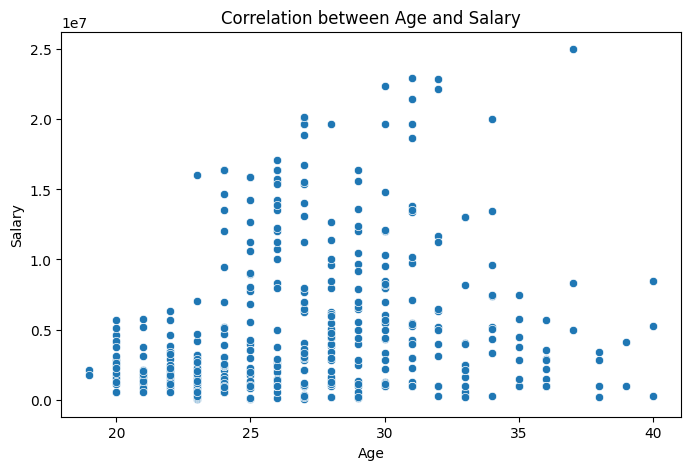

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Correlation between Age and Salary")
plt.show()


In [16]:
print("""
DATA INSIGHTS:
1. Employee distribution shows concentration in specific teams.
2. Certain positions dominate the workforce structure.
3. The predominant age group is between 26–35 years.
4. Senior positions and core teams have the highest salary expenditure.
5. A positive correlation exists between age and salary, indicating experience impacts pay.
""")



DATA INSIGHTS:
1. Employee distribution shows concentration in specific teams.
2. Certain positions dominate the workforce structure.
3. The predominant age group is between 26–35 years.
4. Senior positions and core teams have the highest salary expenditure.
5. A positive correlation exists between age and salary, indicating experience impacts pay.

